## Human Pose Estimation
### Process where it estimates the position of human and detects all the parts available.
### We use Posenet for detecting poses.
### Process: 
Model detects the person first and then it detects the joints and parts. Posenet detects total of 18 parts right from feet to eyes, ears, nose etc.
### Result:
 Results would be in three formats.
 1. Heat map: Heat map co-ordinates are generated
 2. draw humans: Skeleton part of human image is generated.
 3. inference: We will get class of bodyparts which contains the co-ordinates of each body part and confidence of the respective body part

 ## Note: tf-pose is the library used for pose estimation. IT doesn't support the latest version of tf (2X), rather supports the older version (1x) make sure older version is installed. Else when tf-pose is installing, it will automatically downgrade tf to older version. tf-pose is working on compactibility on newer versions.

## Import Libraries

In [ ]:
!pip install tf-pose

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## import estimators.
from tf_pose.estimator import TfPoseEstimator
from tf_pose.networks import model_wh

## Image manipulation
import cv2
from PIL import Image

### Function to display image

In [ ]:
def display_image(image):
  fig= plt.figure(figsize=(8,8))
  plt.grid(False)
  plt.imshow(image)
  plt.show()

### Load pose estimator 
### weights are pre downloaded and passed to TfPoseEstimator class


In [ ]:
weights_path='/content/drive/My Drive/Computer Vision Interview/Human Pose Estimation/graph_opt.pb'
w, h= 400, 400
model= TfPoseEstimator(weights_path, target_size=(400,400))

In [ ]:
### Image loading
image_path='/content/drive/My Drive/Computer Vision Interview/Object Detection/goa.JPG'
pil_image= Image.open(image_path)
image= np.array(pil_image)

In [ ]:
image.shape

(4000, 6000, 3)

### for much faster results, we will resize

In [ ]:
image= cv2.resize(image, (600,400), interpolation= cv2.INTER_AREA)

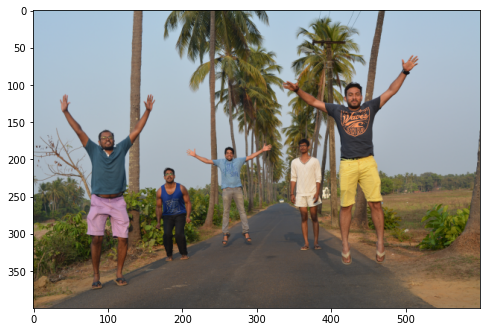

In [ ]:
display_image(image)

### Passing the image for inference

In [ ]:
humans= model.inference(image, resize_to_default=True, upsample_size=5.0)

In [ ]:
humans

[BodyPart:0-(0.30, 0.56) score=0.64 BodyPart:1-(0.31, 0.60) score=0.85 BodyPart:2-(0.28, 0.60) score=0.76 BodyPart:3-(0.28, 0.64) score=0.54 BodyPart:4-(0.29, 0.67) score=0.33 BodyPart:5-(0.33, 0.60) score=0.86 BodyPart:6-(0.34, 0.64) score=0.60 BodyPart:7-(0.34, 0.67) score=0.42 BodyPart:8-(0.30, 0.68) score=0.80 BodyPart:9-(0.30, 0.75) score=0.82 BodyPart:10-(0.31, 0.82) score=0.77 BodyPart:11-(0.33, 0.68) score=0.84 BodyPart:12-(0.33, 0.75) score=0.81 BodyPart:13-(0.34, 0.81) score=0.78 BodyPart:14-(0.30, 0.55) score=0.60 BodyPart:15-(0.31, 0.55) score=0.72 BodyPart:16-(0.29, 0.56) score=0.29 BodyPart:17-(0.32, 0.56) score=0.62,
 BodyPart:1-(0.17, 0.47) score=0.67 BodyPart:2-(0.21, 0.46) score=0.50 BodyPart:5-(0.14, 0.47) score=0.41 BodyPart:8-(0.15, 0.63) score=0.46 BodyPart:9-(0.14, 0.75) score=0.59 BodyPart:10-(0.16, 0.90) score=0.44 BodyPart:11-(0.19, 0.63) score=0.44 BodyPart:12-(0.20, 0.76) score=0.54 BodyPart:13-(0.18, 0.89) score=0.46 BodyPart:16-(0.18, 0.43) score=0.26 Body

#### Now we have got the co-ordinates of body parts and its confidence.
#### Generate heat map for the humans detected.
##### This can be done by taking heatMat class available in model, it is updated or generated when inference method is called.

In [ ]:
print(model.heatMat.shape)

(150, 150, 19)


## The last dimension of the heat map is 18 parts and confidence of the parts
## While marking points on the graph, we will take off the last value and plot first 18 values

In [ ]:
## Pickup the max values in the array
max_prob= np.amax(model.heatMat[:,:,:-1], axis=2)
print(max_prob.shape)

(250, 250)


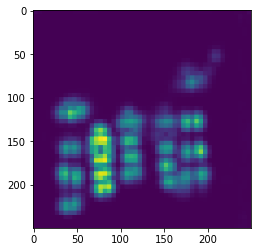

In [ ]:
### Plot the values
plt.imshow(max_prob)

### Skeletons of the humans
#### Retrieving skeletal parts of humans

In [ ]:
skeletal_image= model.draw_humans(image, humans)

In [ ]:
skeletal_image.shape

(4000, 6000, 3)

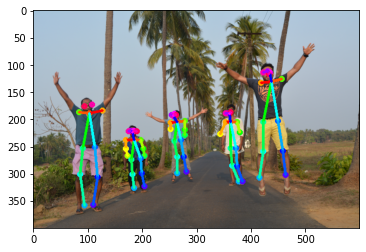

In [ ]:
### Plot the image
plt.imshow(skeletal_image)

### Lets Draw only skeletal part of the image.
#### This can be done by passing an empty image to draw the skeletal part

In [ ]:
empty_img= np.zeros((image.shape))
skeletal= model.draw_humans(empty_img, humans, imgcopy=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


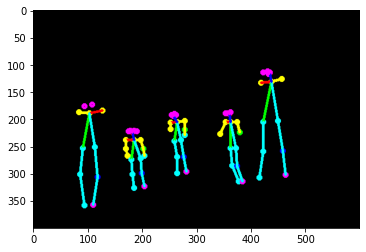

In [ ]:
plt.imshow(skeletal)

### Drawing the co-ordinates of joints/parts
inference rsult has all the co-ordinates of bodyparts aswell as the confidence of each bodypart

In [ ]:
humans

[BodyPart:0-(0.30, 0.56) score=0.64 BodyPart:1-(0.31, 0.60) score=0.85 BodyPart:2-(0.28, 0.60) score=0.76 BodyPart:3-(0.28, 0.64) score=0.54 BodyPart:4-(0.29, 0.67) score=0.33 BodyPart:5-(0.33, 0.60) score=0.86 BodyPart:6-(0.34, 0.64) score=0.60 BodyPart:7-(0.34, 0.67) score=0.42 BodyPart:8-(0.30, 0.68) score=0.80 BodyPart:9-(0.30, 0.75) score=0.82 BodyPart:10-(0.31, 0.82) score=0.77 BodyPart:11-(0.33, 0.68) score=0.84 BodyPart:12-(0.33, 0.75) score=0.81 BodyPart:13-(0.34, 0.81) score=0.78 BodyPart:14-(0.30, 0.55) score=0.60 BodyPart:15-(0.31, 0.55) score=0.72 BodyPart:16-(0.29, 0.56) score=0.29 BodyPart:17-(0.32, 0.56) score=0.62,
 BodyPart:1-(0.17, 0.47) score=0.67 BodyPart:2-(0.21, 0.46) score=0.50 BodyPart:5-(0.14, 0.47) score=0.41 BodyPart:8-(0.15, 0.63) score=0.46 BodyPart:9-(0.14, 0.75) score=0.59 BodyPart:10-(0.16, 0.90) score=0.44 BodyPart:11-(0.19, 0.63) score=0.44 BodyPart:12-(0.20, 0.76) score=0.54 BodyPart:13-(0.18, 0.89) score=0.46 BodyPart:16-(0.18, 0.43) score=0.26 Body

### the result is a list of classes.
### for each element in the list we will find the attributes which stores the docy part as well as the co-ordinates.

In [ ]:
bodyparts=getattr(humans[0], 'body_parts')

In [ ]:
bodyparts

{0: BodyPart:0-(0.30, 0.56) score=0.64,
 1: BodyPart:1-(0.31, 0.60) score=0.85,
 2: BodyPart:2-(0.28, 0.60) score=0.76,
 3: BodyPart:3-(0.28, 0.64) score=0.54,
 4: BodyPart:4-(0.29, 0.67) score=0.33,
 5: BodyPart:5-(0.33, 0.60) score=0.86,
 6: BodyPart:6-(0.34, 0.64) score=0.60,
 7: BodyPart:7-(0.34, 0.67) score=0.42,
 8: BodyPart:8-(0.30, 0.68) score=0.80,
 9: BodyPart:9-(0.30, 0.75) score=0.82,
 10: BodyPart:10-(0.31, 0.82) score=0.77,
 11: BodyPart:11-(0.33, 0.68) score=0.84,
 12: BodyPart:12-(0.33, 0.75) score=0.81,
 13: BodyPart:13-(0.34, 0.81) score=0.78,
 14: BodyPart:14-(0.30, 0.55) score=0.60,
 15: BodyPart:15-(0.31, 0.55) score=0.72,
 16: BodyPart:16-(0.29, 0.56) score=0.29,
 17: BodyPart:17-(0.32, 0.56) score=0.62}

In [ ]:
### Consider the attributes of co-ordinates
co_ordinates=[]
for part in bodyparts.keys():
  axis=[]
  x= getattr(bodyparts[part],'x')
  y= getattr(bodyparts[part], 'y')
  ##Store it in the axis
  axis.append(x)
  axis.append(y)
  co_ordinates.append(axis)



In [ ]:
co_ordinates

[[0.304, 0.56],
 [0.308, 0.596],
 [0.284, 0.596],
 [0.284, 0.636],
 [0.288, 0.668],
 [0.328, 0.596],
 [0.336, 0.636],
 [0.34, 0.668],
 [0.3, 0.684],
 [0.304, 0.752],
 [0.308, 0.816],
 [0.328, 0.68],
 [0.332, 0.748],
 [0.34, 0.808],
 [0.296, 0.552],
 [0.308, 0.552],
 [0.292, 0.556],
 [0.316, 0.556]]

In [ ]:
### Convert Co-ordinates to array
co_ordinates= np.array(co_ordinates)

## The co-ordinates in array are the percentages of the shape of the image.
### Multiplying the image shape with co-ordinates will give the exact number to plot

In [ ]:
pixel_co_ordinate= co_ordinates * (image.shape[1], image.shape[0])

In [ ]:
pixel_co_ordinate

array([[182.4, 224. ],
       [184.8, 238.4],
       [170.4, 238.4],
       [170.4, 254.4],
       [172.8, 267.2],
       [196.8, 238.4],
       [201.6, 254.4],
       [204. , 267.2],
       [180. , 273.6],
       [182.4, 300.8],
       [184.8, 326.4],
       [196.8, 272. ],
       [199.2, 299.2],
       [204. , 323.2],
       [177.6, 220.8],
       [184.8, 220.8],
       [175.2, 222.4],
       [189.6, 222.4]])

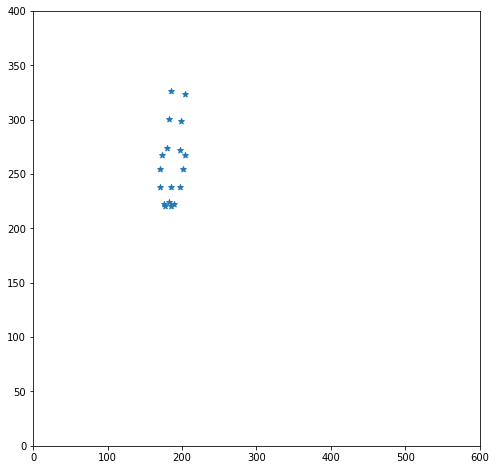

In [ ]:
## Lets plot the image of points
### Seperate x and y axis from the array
x,y= zip(*pixel_co_ordinate)
###Create a figure and set axis equal to image size
fig= plt.figure(figsize=(8,8))
plt.axis([0, image.shape[1], 0, image.shape[0]])
plt.scatter(x, y,marker='*' )

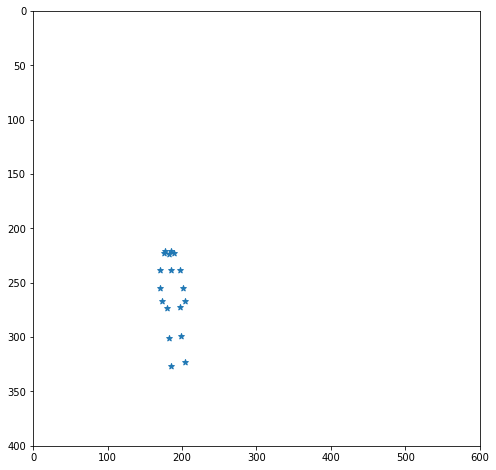

In [ ]:
##3 the y axis is inverted. 
### Conversion
fig= plt.figure(figsize=(8,8))
plt.grid(False)
plt.axis([0, image.shape[1], 0, image.shape[0]])
##inverse the y-axis
### get current axis (gca)
ax= plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
plt.scatter(x, y, marker='*')

## Above is for only one person.
## Looping the humans and process for all the persons.

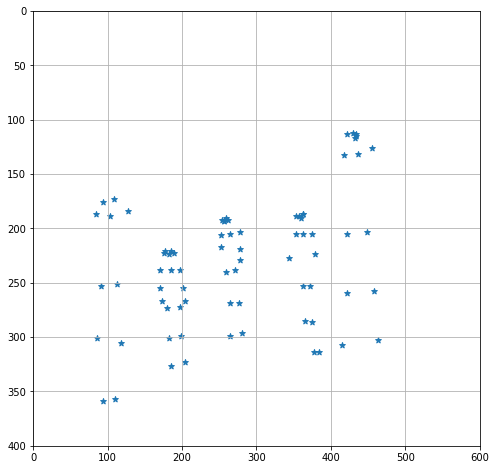

In [ ]:
co_ordinates=[]
for person in humans:
  bodyparts= getattr(person, 'body_parts')
  ## Looparound body parts and get the co-ordinates
  for part in bodyparts.keys():
    axis=[]
    x= getattr(bodyparts[part], 'x')
    y= getattr(bodyparts[part], 'y')
    axis.append(x)
    axis.append(y)
    ##Append x and y axis into co-ordinates
    co_ordinates.append(axis)

### Convert co-ordinates to array and multiply with image shape
### The result of co-ordinates came with width and height so, multiplication happens with image shape accordingly
array_co_ordinates= np.array(co_ordinates)
array_co_ordinates= array_co_ordinates * (image.shape[1], image.shape[0])
### Split to co-ordinates
x, y= zip(*array_co_ordinates)

### Create plot graph
fig= plt.figure(figsize=(8,8))
plt.grid(True)
plt.axis([0, image.shape[1], 0, image.shape[0]])
## invert y-axis
ax= plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
plt.scatter(x, y, marker='*')